In [ ]:
"""
1. 문제 정의
  - 영화 리뷰에 대한 긍정, 부정적인 평가를 예측하는 이진 분류 문제.
2. 데이터 확보
  - keras IMDB dataset을 사용합니다.
3. 데이터 특징 추출
4. 데이터 전처리
5. 모델 비교
6. 모델 준비
7. 모델 학습
8. 모델 평가
9. 모델 튜닝
10. 모델 서빙

colab : https://colab.research.google.com/drive/1TsPfEEvQh9QmY8awKvhgjOpKpPsszP4Z?usp=sharing
"""

In [4]:
#2. 데이터 준비
from keras.datasets import imdb

# num_words = 10000으로 설정하여, 데이터에서 자주 나타나는 단어 1만개만 선택해서 사용한다. 만약, 모든 단어(88,585개)를 사용하면 불필요하게 많은 데이터를 학습하게 된다. <- 어떤 결과를 가져오는지?
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 ... 0 1 0]


In [7]:
# 단어가 1만개인지 확인
max([max(sequence) for sequence in train_data])

9999

In [8]:
# 숫자 시퀀스를 decoding해서 리뷰 데이터 확인
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
# 10000개의 차원으로 Multi-hot 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
# label to vector
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
# 모델 준비
# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# 검증 데이터 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6927 - loss: 0.5998 - val_accuracy: 0.8522 - val_loss: 0.4164
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8909 - loss: 0.3613 - val_accuracy: 0.8837 - val_loss: 0.3254
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9188 - loss: 0.2651 - val_accuracy: 0.8867 - val_loss: 0.2939
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9350 - loss: 0.2056 - val_accuracy: 0.8823 - val_loss: 0.2908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9437 - loss: 0.1734 - val_accuracy: 0.8882 - val_loss: 0.2757
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9572 - loss: 0.1431 - val_accuracy: 0.8833 - val_loss: 0.2909
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9608 - loss: 0.1292 - val_accuracy: 0.8818 - val_loss: 0.2957
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9691 - loss: 0.1091 - val_accuracy: 0.8837 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

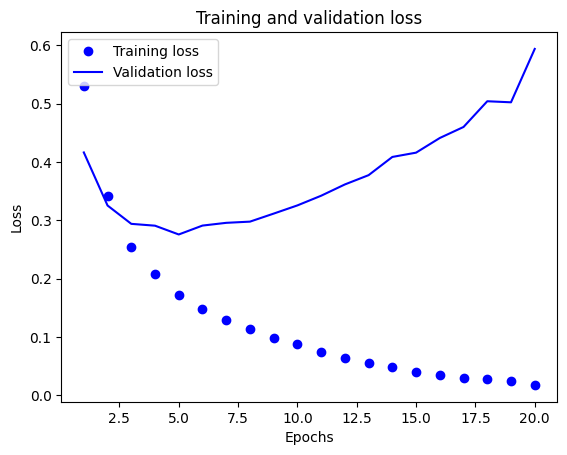

In [26]:
# 훈련 및 검증 손실 시각화

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

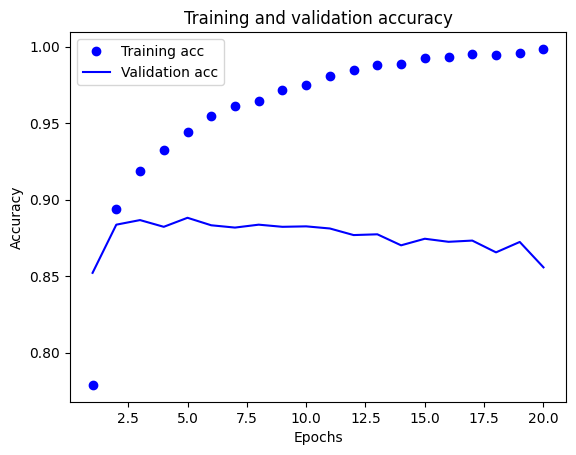

In [27]:
# 훈련 및 검증 정확도 시각화

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# 모델 재훈련
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7325 - loss: 0.5975
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8853 - loss: 0.3429
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9108 - loss: 0.2519
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9299 - loss: 0.2044
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8822 - loss: 0.2889


[0.2894138991832733, 0.8832399845123291]